### Import Library

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv("./winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [3]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
# print(df.iloc[0,:-1])
# print(len(df))
# X_train = [df.iloc[i,:-1] for i in range(0.2 * len(df))]

In [5]:
X = X_df.as_matrix()
y_df = df["quality"].values
print(y_df[:10])

[5 5 5 6 5 5 5 7 7 5]


### Data Preview

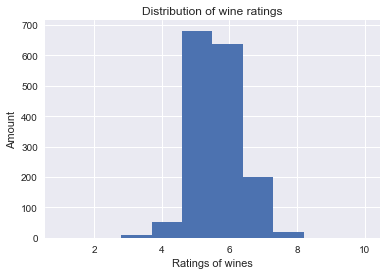

In [6]:
plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.savefig('data_hist.png', format = 'png', dpi = 1000)
plt.show()

In [7]:
# sklearn can only deal with numpy arrys
Y = np.array([1 if i>=7 else 0 for i in y_df])


### SVM Classifier Construction

Choose SVM method to do the classification.

In [8]:
#Split set into test and train
X_test=[]
X_train=[]
Y_test=[]
Y_train=[]

X_test=[X[i] for i in range(int(0.2*len(X)))]
X_train=[X[i] for i in range(int(0.2*len(X)),len(X))]
Y_test=[Y[i] for i in range(int(0.2*len(Y)))]
Y_train=[Y[i] for i in range(int(0.2*len(Y)),len(Y))]

In [ ]:


# loo=LeaveOneOut()
# loo.get_n_splits(Y_train)
cv_scores=[]
C=1.0

models = (
#           svm.SVC(kernel='linear', C=C),
#           svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.2, C=C),
          svm.SVC(kernel='rbf', gamma=0.4, C=C),
          svm.SVC(kernel='rbf', gamma=0.6, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=1.2, C=C),
          svm.SVC(kernel='rbf', gamma=1.3, C=C),
          svm.SVC(kernel='rbf', gamma=1.4, C=C),
          svm.SVC(kernel='rbf', gamma=1.8, C=C))
#           svm.SVC(kernel='poly', degree=2, C=C),
#           svm.SVC(kernel='poly', degree=3, C=C),
#           svm.SVC(kernel='poly', degree=4, C=C))

for m in models:
    scores = cross_val_score(m, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print ("index          Score          MSE")
for i in range(len(models)):
    print ('%d          %.5f' % (i, cv_scores[i]))

In [9]:
models = (svm.SVC(kernel='linear', C=1.0),
          svm.LinearSVC(C=1.0),
          svm.SVC(kernel='rbf', gamma=1.4, C=1.0),)

Accuracys=[]
Precisions=[]
Recalls=[]
TrueNegativeRates=[]
F=[]

for model in models:
    model.fit(X_train,Y_train)
    TP=0.0
    FP=0.0
    TN=0.0
    FN=0.0
    for i,x in enumerate(X_test):
        prediction=model.predict(x)[0]
        if prediction==1 and Y_test[i]==1:
            TP+=1
        elif prediction==1 and Y_test[i]==0:
            FP+=1
        elif prediction==0 and Y_test[i]==1:
            FN+=1
        elif prediction==0 and Y_test[i]==0:
            TN+=1
    Accuracys.append((TP+TN)/(TP+TN+FP+FN))
    Precisions.append(TP/(TP+FP) if (TP+FP)!=0 else 0)
    Recalls.append(TP/(TP+FN))
    TrueNegativeRates.append(TN/(TN+FP))
for i in range(3):
    F.append((2*Precisions[i]*Recalls[i])/(Precisions[i]+Recalls[i]) if (Precisions[i]+Recalls[i])!=0 else 0)

/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/tong/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [10]:
print Accuracys
print Precisions
print Recalls
print TrueNegativeRates
print F

[0.9247648902821317, 0.8996865203761756, 0.9278996865203761]
[0, 0.16666666666666666, 1.0]
[0.0, 0.08333333333333333, 0.041666666666666664]
[1.0, 0.9661016949152542, 1.0]
[0, 0.1111111111111111, 0.07999999999999999]
